# Demonstration of Student's t distribution

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as students_t
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [6, 6]

Pull nn numbers from a gaussian random number generator, with zero mean, sigma=sigma_true.  
Find the sample mean, and sample error on the mean, 
of those nn numbers.  The true mean is zero, so record t = m/err, then repeat a large number of times.  Histogram the values of t, and overplot a gaussian of width sigma_true/sqrt(nn).

The histogram will deviate significantly from the overplotted gaussian for small nn.

true_err=  1.1547005383792517


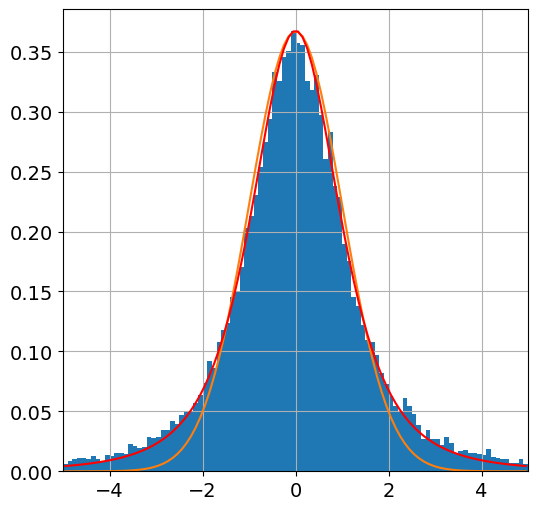

In [95]:
# Number of numbers to draw, from which mean and error on mean are calculated, for each iteration.
# Large will converge to gaussian.  Small will deviate from gaussian.
nn = 3

n_iter = 20000  # number of iterations

rng = np.random.default_rng(seed=None)   # set seed to an int to use one.
sigma = 2
true_err = sigma/np.sqrt(nn)
print('true_err= ',true_err)
tval = np.array([])

for i in range(n_iter):
    x = sigma*rng.standard_normal(nn)
    mu = np.mean(x)
    s = np.std(x,ddof=1)
    err = s/np.sqrt(nn)
    tval = np.append(tval,mu/err)

#plt.plot(tval)
n,bins,a = plt.hist(tval,range = [-5,5],bins=100,density=True)
x = (bins[1:]+bins[:-1])/2
tdist = students_t.pdf(x,nn)
plt.plot(x,np.max(tdist)*np.exp(-x**2/(2)))
plt.plot(x,tdist,'r')

plt.xlim(-5,5)
plt.grid()

That these distributions are different for small nn is the point behind Student's t.  For small nn, you're much more likely to have large variations from the true mean, as measured by "(sample mean - true mean)/sample_error_on_mean" than a normal distribution would predict.